In [1]:
import pandas as pd
import albumentations as A

from utils.dataset import RemovePenMarkAlbumentations
import torch
from torch.utils.data import DataLoader
from work.utils.dataset import PandasDataset
import matplotlib.pyplot as plt
import numpy as np

/home/woshington/Projects/Doutorado/venv/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.4' (you have '2.0.2'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
df = pd.DataFrame(data=[{"image_id": "c4b1a10db8b0cdece7a1498b2fcbda7f", "isup_grade": 1}])
df.head()

,image_id,isup_grade
0,c4b1a10db8b0cdece7a1498b2fcbda7f,1


In [3]:
transforms_train = A.Compose([
    RemovePenMarkAlbumentations(is_white=False),
    A.Transpose(p=0.5),
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5),
])

In [4]:
dataset = PandasDataset("../dataset/tiles", df, transforms_train)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=2)

In [5]:
train_features, train_labels, img_id = next(iter(dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].permute(1, 2, 0).numpy()

Feature batch shape: torch.Size([1, 3, 1536, 1536])
Labels batch shape: torch.Size([1, 5])


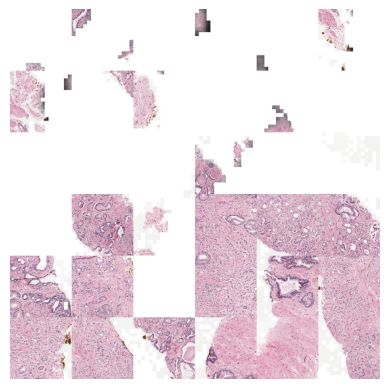

In [6]:
plt.imshow(img)
plt.axis("off")  # Desativa os eixos
plt.show()